# Import packages

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import pandas_profiling


#Helpers
%matplotlib inline

from sqlalchemy import create_engine
import pymysql
import plotly.graph_objects as go


#importing libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import f1_score, r2_score, accuracy_score, precision_score, make_scorer, confusion_matrix, roc_auc_score,roc_curve, recall_score
from sklearn.model_selection import learning_curve, train_test_split, cross_validate
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
import itertools
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))
from IPython.display import Image 
from sklearn.tree import export_graphviz
from io import StringIO
from six.moves.cPickle import loads
from sklearn import svm
import graphviz
from sklearn.linear_model import LinearRegression, LogisticRegression    
from scipy.special import logsumexp
from sklearn.preprocessing import RobustScaler
    
clf=LinearRegression()   #creating LinearRegression Classifier


#Float Formatting
pd.options.display.float_format = '{:,.2f}'.format

## Import Data

In [2]:
data = pd.read_csv('C:/Users/kltho/Credit_One_Customer_Default.csv')
print(data.shape)

(30000, 26)


Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=High School, 2=Others, 3=Graduate School, 4=University, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* AGE_BIN: >20, =>30, =>40, =>50, =>60, =>70
* PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=no, 2=yes)

## Evaluate data

In [3]:
data.dtypes

Unnamed: 0                     int64
ID                             int64
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  30000 non-null  int64 
 1   ID                          30000 non-null  int64 
 2   LIMIT_BAL                   30000 non-null  int64 
 3   SEX                         30000 non-null  object
 4   EDUCATION                   30000 non-null  object
 5   MARRIAGE                    30000 non-null  int64 
 6   AGE                         30000 non-null  int64 
 7   PAY_0                       30000 non-null  int64 
 8   PAY_2                       30000 non-null  int64 
 9   PAY_3                       30000 non-null  int64 
 10  PAY_4                       30000 non-null  int64 
 11  PAY_5                       30000 non-null  int64 
 12  PAY_6                       30000 non-null  int64 
 13  BILL_AMT1                   30000 non-null  in

In [5]:
data.isnull().sum().sort_values(ascending=False)

default payment next month    0
PAY_AMT6                      0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
Unnamed: 0                    0
dtype: int64

In [6]:
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [7]:
#features
data = data.iloc[:, 2:]
print('Summary of feature sample')
data.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [8]:
data = data.replace([' ','?'], np.nan)

## EDA
### Statistical Analysis

In [9]:
#Convert dtypes from 'object' to 'category'
data['SEX'] = data['SEX'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['default payment next month'] = data['default payment next month'].astype('category')

In [10]:
#Then change from categorical to numerical datatypes and store in a different column
data = data.assign(SEX_ID = data['SEX'].cat.codes)
data = data.assign(EDUCATION_ID = data['EDUCATION'].cat.codes)
data = data.assign(def_pay = data['default payment next month'].cat.codes)

In [11]:
# Categorical variables description
data[['SEX_ID', 'EDUCATION_ID', 'MARRIAGE', 'def_pay']].describe()

,SEX_ID,EDUCATION_ID,MARRIAGE,def_pay
count,"30,000.00","30,000.00","30,000.00","30,000.00"
mean,0.40,1.60,1.55,0.78
std,0.49,1.37,0.52,0.42
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,1.00
50%,0.00,1.00,2.00,1.00
75%,1.00,3.00,2.00,1.00
max,1.00,3.00,3.00,1.00


In [12]:
# Bill Statement statistics
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"51,223.33","49,179.08","47,013.15","43,262.95","40,311.40","38,871.76"
std,"73,635.86","71,173.77","69,349.39","64,332.86","60,797.16","59,554.11"
min,"-165,580.00","-69,777.00","-157,264.00","-170,000.00","-81,334.00","-339,603.00"
25%,"3,558.75","2,984.75","2,666.25","2,326.75","1,763.00","1,256.00"
50%,"22,381.50","21,200.00","20,088.50","19,052.00","18,104.50","17,071.00"
75%,"67,091.00","64,006.25","60,164.75","54,506.00","50,190.50","49,198.25"
max,"964,511.00","983,931.00","1,664,089.00","891,586.00","927,171.00","961,664.00"


What do negative amounts mean? Credit to account? Will need to look at closer.

In [13]:
#Previous Payment Description
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"5,663.58","5,921.16","5,225.68","4,826.08","4,799.39","5,215.50"
std,"16,563.28","23,040.87","17,606.96","15,666.16","15,278.31","17,777.47"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,000.00",833.00,390.00,296.00,252.50,117.75
50%,"2,100.00","2,009.00","1,800.00","1,500.00","1,500.00","1,500.00"
75%,"5,006.00","5,000.00","4,505.00","4,013.25","4,031.50","4,000.00"
max,"873,552.00","1,684,259.00","896,040.00","621,000.00","426,529.00","528,666.00"


Payment Status Details PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

In [14]:
# Payment delay description (each number representing payments past due)
# Pay_0 must represent 'Duly Payed' (payed on time)
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29
std,1.12,1.20,1.20,1.17,1.13,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [15]:
#Rename feature 'default payment next month' and change value '0' to represent first payment
data = data.rename(columns={'PAY_0': 'PAY_1'})
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_ID,EDUCATION_ID,def_pay
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,default,0,3,0
1,120000,female,university,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,default,0,3,0
2,90000,female,university,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,0,3,1
3,50000,female,university,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,0,3,1
4,50000,male,university,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,not default,1,3,1


In [16]:
data.LIMIT_BAL.describe()

count      30,000.00
mean      167,484.32
std       129,747.66
min        10,000.00
25%        50,000.00
50%       140,000.00
75%       240,000.00
max     1,000,000.00
Name: LIMIT_BAL, dtype: float64

In [17]:
data.EDUCATION.value_counts()

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64

In [18]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [19]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3

In [20]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [21]:
fill = (data.EDUCATION_ID == 0)
data.loc[fill, 'EDUCATION_ID'] = 4

In [22]:
data.EDUCATION_ID.value_counts()

3    14030
4    10585
1     4917
2      468
Name: EDUCATION_ID, dtype: int64

In [23]:
fill_S = (data.SEX_ID == 0)
data.loc[fill_S, 'SEX_ID'] = 2

In [24]:
data.SEX_ID.value_counts()

2    18112
1    11888
Name: SEX_ID, dtype: int64

In [25]:
fill_D = (data.def_pay == 0)
data.loc[fill_D, 'def_pay'] = 2

In [26]:
# Non-Defalut = 1, Default = 2
data.def_pay.value_counts()

1    23364
2     6636
Name: def_pay, dtype: int64

In [27]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_ID', 'EDUCATION_ID', 'def_pay'],
      dtype='object')

### Analyze Data Attributes

In [28]:
data.EDUCATION_ID.describe()

count   30,000.00
mean         3.01
std          1.01
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          4.00
Name: EDUCATION_ID, dtype: float64

In [29]:
data.SEX_ID.describe()

count   30,000.00
mean         1.60
std          0.49
min          1.00
25%          1.00
50%          2.00
75%          2.00
max          2.00
Name: SEX_ID, dtype: float64

In [30]:
data.MARRIAGE.describe()

count   30,000.00
mean         1.56
std          0.52
min          1.00
25%          1.00
50%          2.00
75%          2.00
max          3.00
Name: MARRIAGE, dtype: float64

In [31]:
data.def_pay.value_counts()

1    23364
2     6636
Name: def_pay, dtype: int64

In [32]:
data.AGE.describe()

count   30,000.00
mean        35.49
std          9.22
min         21.00
25%         28.00
50%         34.00
75%         41.00
max         79.00
Name: AGE, dtype: float64

In [33]:
data.PAY_1.describe()

count   30,000.00
mean        -0.02
std          1.12
min         -2.00
25%         -1.00
50%          0.00
75%          0.00
max          8.00
Name: PAY_1, dtype: float64

In [34]:
data.PAY_2.describe()

count   30,000.00
mean        -0.13
std          1.20
min         -2.00
25%         -1.00
50%          0.00
75%          0.00
max          8.00
Name: PAY_2, dtype: float64

In [35]:
data.PAY_3.describe()

count   30,000.00
mean        -0.17
std          1.20
min         -2.00
25%         -1.00
50%          0.00
75%          0.00
max          8.00
Name: PAY_3, dtype: float64

In [36]:
data.PAY_4.describe()

count   30,000.00
mean        -0.22
std          1.17
min         -2.00
25%         -1.00
50%          0.00
75%          0.00
max          8.00
Name: PAY_4, dtype: float64

In [37]:
data.PAY_5.describe()

count   30,000.00
mean        -0.27
std          1.13
min         -2.00
25%         -1.00
50%          0.00
75%          0.00
max          8.00
Name: PAY_5, dtype: float64

In [38]:
data.PAY_6.describe()

count   30,000.00
mean        -0.29
std          1.15
min         -2.00
25%         -1.00
50%          0.00
75%          0.00
max          8.00
Name: PAY_6, dtype: float64

In [39]:
data.BILL_AMT1.describe()

count     30,000.00
mean      51,223.33
std       73,635.86
min     -165,580.00
25%        3,558.75
50%       22,381.50
75%       67,091.00
max      964,511.00
Name: BILL_AMT1, dtype: float64

In [40]:
data.BILL_AMT2.describe()

count    30,000.00
mean     49,179.08
std      71,173.77
min     -69,777.00
25%       2,984.75
50%      21,200.00
75%      64,006.25
max     983,931.00
Name: BILL_AMT2, dtype: float64

In [41]:
data.BILL_AMT3.describe()

count      30,000.00
mean       47,013.15
std        69,349.39
min      -157,264.00
25%         2,666.25
50%        20,088.50
75%        60,164.75
max     1,664,089.00
Name: BILL_AMT3, dtype: float64

In [42]:
data.BILL_AMT4.describe()

count     30,000.00
mean      43,262.95
std       64,332.86
min     -170,000.00
25%        2,326.75
50%       19,052.00
75%       54,506.00
max      891,586.00
Name: BILL_AMT4, dtype: float64

In [43]:
data.BILL_AMT5.describe()

count    30,000.00
mean     40,311.40
std      60,797.16
min     -81,334.00
25%       1,763.00
50%      18,104.50
75%      50,190.50
max     927,171.00
Name: BILL_AMT5, dtype: float64

In [44]:
data.BILL_AMT6.describe()

count     30,000.00
mean      38,871.76
std       59,554.11
min     -339,603.00
25%        1,256.00
50%       17,071.00
75%       49,198.25
max      961,664.00
Name: BILL_AMT6, dtype: float64

In [45]:
data.PAY_AMT1.describe()

count    30,000.00
mean      5,663.58
std      16,563.28
min           0.00
25%       1,000.00
50%       2,100.00
75%       5,006.00
max     873,552.00
Name: PAY_AMT1, dtype: float64

In [46]:
data.PAY_AMT2.describe()

count      30,000.00
mean        5,921.16
std        23,040.87
min             0.00
25%           833.00
50%         2,009.00
75%         5,000.00
max     1,684,259.00
Name: PAY_AMT2, dtype: float64

In [47]:
data.PAY_AMT3.describe()

count    30,000.00
mean      5,225.68
std      17,606.96
min           0.00
25%         390.00
50%       1,800.00
75%       4,505.00
max     896,040.00
Name: PAY_AMT3, dtype: float64

In [48]:
data.PAY_AMT4.describe()

count    30,000.00
mean      4,826.08
std      15,666.16
min           0.00
25%         296.00
50%       1,500.00
75%       4,013.25
max     621,000.00
Name: PAY_AMT4, dtype: float64

In [49]:
data.PAY_AMT5.describe()

count    30,000.00
mean      4,799.39
std      15,278.31
min           0.00
25%         252.50
50%       1,500.00
75%       4,031.50
max     426,529.00
Name: PAY_AMT5, dtype: float64

In [50]:
data.PAY_AMT6.describe()

count    30,000.00
mean      5,215.50
std      17,777.47
min           0.00
25%         117.75
50%       1,500.00
75%       4,000.00
max     528,666.00
Name: PAY_AMT6, dtype: float64

In [51]:
data.LIMIT_BAL.describe()

count      30,000.00
mean      167,484.32
std       129,747.66
min        10,000.00
25%        50,000.00
50%       140,000.00
75%       240,000.00
max     1,000,000.00
Name: LIMIT_BAL, dtype: float64

### Feature Engineering

#### Bin Data

For ease of analysis, we will bin the data into decades.

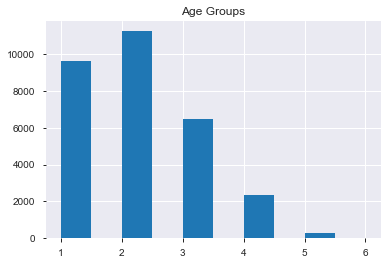

Age Groupings (years): (1:>20, 2:>= 30, 3:>= 40, 4:>= 50, 5:>= 60, 6:>= 70)


In [52]:
data['AgeBin'] = 0 #creates a column of 0
data.loc[((data['AGE'] > 20) & (data['AGE'] < 30)) , 'AgeBin'] = 1
data.loc[((data['AGE'] >= 30) & (data['AGE'] < 40)) , 'AgeBin'] = 2
data.loc[((data['AGE'] >= 40) & (data['AGE'] < 50)) , 'AgeBin'] = 3
data.loc[((data['AGE'] >= 50) & (data['AGE'] < 60)) , 'AgeBin'] = 4
data.loc[((data['AGE'] >= 60) & (data['AGE'] < 70)) , 'AgeBin'] = 5
data.loc[((data['AGE'] >= 70) & (data['AGE'] < 81)) , 'AgeBin'] = 6
plt.figure()
plt.title('Age Groups')
data.AgeBin.hist()
plt.show()
print("Age Groupings (years): (1:>20, 2:>= 30, 3:>= 40, 4:>= 50, 5:>= 60, 6:>= 70)")

In [53]:
def formgroup(Col1, Col2):
    res = data.groupby([Col1, Col2]).size().unstack()
    return res

In [54]:
data['SEX_MAR'] = data.SEX_ID * data.MARRIAGE
formgroup('SEX_MAR', 'def_pay')
data['SEX_MAR_2'] = 0
data.loc[((data.SEX_ID == 1) & (data.MARRIAGE == 1)) , 'SEX_MAR_2'] = 1 #married man
data.loc[((data.SEX_ID == 1) & (data.MARRIAGE == 2)) , 'SEX_MAR_2'] = 2 #single man
data.loc[((data.SEX_ID == 1) & (data.MARRIAGE == 3)) , 'SEX_MAR_2'] = 3 #divorced man
data.loc[((data.SEX_ID == 2) & (data.MARRIAGE == 1)) , 'SEX_MAR_2'] = 4 #married woman
data.loc[((data.SEX_ID == 2) & (data.MARRIAGE == 2)) , 'SEX_MAR_2'] = 5 #single woman
data.loc[((data.SEX_ID == 2) & (data.MARRIAGE == 3)) , 'SEX_MAR_2'] = 6 #divorced woman
formgroup('SEX_MAR_2', 'def_pay')
del data['SEX_MAR']
data = data.rename(columns={'SEX_MAR_2': 'SEX_MAR'})

Default by Age Groups

In [55]:
agedefpay=formgroup('AgeBin', 'def_pay')
print(agedefpay)
agesex=formgroup('AgeBin', 'SEX_ID')
print(agesex)

def_pay     1     2
AgeBin             
1        7421  2197
2        8962  2276
3        4979  1485
4        1759   582
5         225    89
6          18     7
SEX_ID     1     2
AgeBin            
1       3281  6337
2       4565  6673
3       2771  3693
4       1092  1249
5        166   148
6         13    12


In [56]:
data['SEX_AGE'] = 0
data.loc[((data.SEX_ID == 1) & (data.AgeBin == 1)) , 'SEX_AGE'] = 1 #FEMALE 20'yrs
data.loc[((data.SEX_ID == 1) & (data.AgeBin == 2)) , 'SEX_AGE'] = 2 #FEMALE 30'yrs
data.loc[((data.SEX_ID == 1) & (data.AgeBin == 3)) , 'SEX_AGE'] = 3 #FEMALE 40'yrs
data.loc[((data.SEX_ID == 1) & (data.AgeBin == 4)) , 'SEX_AGE'] = 4 #FEMALE 50'yrs
data.loc[((data.SEX_ID == 1) & (data.AgeBin == 5)) , 'SEX_AGE'] = 5 #FEMALE 60+
data.loc[((data.SEX_ID == 2) & (data.AgeBin == 1)) , 'SEX_AGE'] = 6 #MALE 20'yrs
data.loc[((data.SEX_ID == 2) & (data.AgeBin == 2)) , 'SEX_AGE'] = 7 #MALE 30'yrs
data.loc[((data.SEX_ID == 2) & (data.AgeBin == 3)) , 'SEX_AGE'] = 8 #MALE 40'yrs
data.loc[((data.SEX_ID == 2) & (data.AgeBin == 4)) , 'SEX_AGE'] = 9 #MALE 50'yrs
data.loc[((data.SEX_ID == 2) & (data.AgeBin == 5)) , 'SEX_AGE'] = 10 #MALE 60+
formgroup('SEX_AGE', 'def_pay')

def_pay,1,2
SEX_AGE,,
0,18,7
1,2492,789
2,3515,1050
3,2080,691
4,797,295
5,122,44
6,4929,1408
7,5447,1226
8,2899,794


In [57]:
#Actively Using
data['active_6'] = 1
data['active_5'] = 1
data['active_4'] = 1
data['active_3'] = 1
data['active_2'] = 1
data['active_1'] = 1
data.loc[((data.PAY_6 == 0) & (data.BILL_AMT6 == 0) & (data.PAY_AMT6 == 0)) , 'active_6'] = 0
data.loc[((data.PAY_5 == 0) & (data.BILL_AMT5 == 0) & (data.PAY_AMT5 == 0)) , 'active_5'] = 0
data.loc[((data.PAY_4 == 0) & (data.BILL_AMT4 == 0) & (data.PAY_AMT4 == 0)) , 'active_4'] = 0
data.loc[((data.PAY_3 == 0) & (data.BILL_AMT3 == 0) & (data.PAY_AMT3 == 0)) , 'active_3'] = 0
data.loc[((data.PAY_2 == 0) & (data.BILL_AMT2 == 0) & (data.PAY_AMT2 == 0)) , 'active_2'] = 0
data.loc[((data.PAY_1 == 0) & (data.BILL_AMT1 == 0) & (data.PAY_AMT1 == 0)) , 'active_1'] = 0

In [58]:
pd.Series([data[data.active_6 == 1].def_pay.count(),
          data[data.active_5 == 1].def_pay.count(),
          data[data.active_4 == 1].def_pay.count(),
          data[data.active_3 == 1].def_pay.count(),
          data[data.active_2 == 1].def_pay.count(),
          data[data.active_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    29569
5    29743
4    29816
3    29787
2    29815
1    30000
dtype: int64

Amount Billed in relation to the Balance Limit

In [59]:
data['average_5'] = ((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5']))) / data['LIMIT_BAL']*100
data['average_4'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4']))) / 2) / data['LIMIT_BAL']*100
data['average_3'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4'])) +
                 (data['BILL_AMT3'] - (data['BILL_AMT4'] - data['PAY_AMT3']))) / 3) / data['LIMIT_BAL']*100
data['average_2'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4'])) +
                 (data['BILL_AMT3'] - (data['BILL_AMT4'] - data['PAY_AMT3'])) +
                 (data['BILL_AMT2'] - (data['BILL_AMT3'] - data['PAY_AMT2']))) / 4) / data['LIMIT_BAL']*100
data['average_1'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4'])) +
                 (data['BILL_AMT3'] - (data['BILL_AMT4'] - data['PAY_AMT3'])) +
                 (data['BILL_AMT2'] - (data['BILL_AMT3'] - data['PAY_AMT2'])) +
                 (data['BILL_AMT1'] - (data['BILL_AMT2'] - data['PAY_AMT1']))) / 5) / data['LIMIT_BAL']*100
average=data[['LIMIT_BAL', 'average_5', 'BILL_AMT5', 'average_4', 'BILL_AMT4','average_3', 'BILL_AMT3',
    'average_2', 'BILL_AMT2', 'average_1', 'BILL_AMT1', 'def_pay']].sample(20)
print(average)

       LIMIT_BAL  average_5  BILL_AMT5  average_4  BILL_AMT4  average_3  \
12874     170000       0.85      86538       0.87      84558      10.98   
19735     200000       4.62      62356       3.80      66234       2.73   
28935     460000       1.25       5739       2.00      12657       2.89   
12755     230000       0.00          0       0.00          0       0.00   
6584      260000       4.17      10854       4.61      13100       3.71   
26244     500000       5.15     265742       7.98     312315      11.55   
14165     210000       2.91     107697       3.41     111893      19.40   
12916     330000       0.67       2205       1.77       6033       1.82   
4463      220000       1.08       2256       1.22       2963       1.36   
24107     110000       1.09      74138       1.37      73253       1.45   
23077     230000       0.00         -1       0.00         -1       0.00   
18599     320000       0.41     105952       1.20     107318       1.86   
23929      50000       0.

In [60]:
# Percentage of Bill Amount as a total of the Limit Balance
# Non-Defalut = 1, Default = 2

In [61]:
data['InvoiceLimit_6'] = (data.LIMIT_BAL - data.BILL_AMT6) / data.LIMIT_BAL*100
data['InvoiceLimit_5'] = (data.LIMIT_BAL - data.BILL_AMT5) / data.LIMIT_BAL*100
data['InvoiceLimit_4'] = (data.LIMIT_BAL - data.BILL_AMT4) / data.LIMIT_BAL*100
data['InvoiceLimit_3'] = (data.LIMIT_BAL - data.BILL_AMT3) / data.LIMIT_BAL*100
data['InvoiceLimit_2'] = (data.LIMIT_BAL - data.BILL_AMT2) / data.LIMIT_BAL*100
data['InvoiceLimit_1'] = (data.LIMIT_BAL - data.BILL_AMT1) / data.LIMIT_BAL*100
InvoiceLimit=data[['InvoiceLimit_6', 'InvoiceLimit_5', 'InvoiceLimit_4', 'InvoiceLimit_3', 'InvoiceLimit_2',
   'InvoiceLimit_1', 'def_pay']].sample(20)
print(InvoiceLimit)

       InvoiceLimit_6  InvoiceLimit_5  InvoiceLimit_4  InvoiceLimit_3  \
19914           83.44           84.15           84.86           84.80   
6860            64.45           65.32           66.24           66.75   
6927            91.23           91.48           90.92           91.03   
18276           64.29           61.88            9.68            9.95   
23456          100.00           99.79           99.50           94.04   
7169           100.00          100.00          100.00          100.00   
902             84.27           76.40           76.67           45.65   
12974           99.89           99.68           99.50           99.49   
23198           84.01           84.93           85.35           85.76   
1127            97.94           99.00           99.86           99.37   
28832           69.59           60.41           51.29           52.56   
4862             6.51            8.28           10.40            8.17   
23052          100.00          100.00          100.

In [62]:
data['PAY_1_-1'] = (data.PAY_1 == -1)
data['PAY_1_-2'] = (data.PAY_1 == -2)
data['PAY_1_0'] = (data.PAY_1 == 0)
data['PAY_1_1'] = (data.PAY_1 == 1)
data['PAY_1_2'] = (data.PAY_1 == 2)
data['PAY_1_3'] = (data.PAY_1 == 3)
data['PAY_1_4'] = (data.PAY_1 == 4)
data['PAY_1_5'] = (data.PAY_1 == 5)
data['PAY_1_6'] = (data.PAY_1 == 6)
data['PAY_1_7'] = (data.PAY_1 == 7)
data['PAY_1_8'] = (data.PAY_1 == 8)

data['PAY_2_-1'] = (data.PAY_1 == -1)
data['PAY_2_-2'] = (data.PAY_1 == -2)
data['PAY_2_0'] = (data.PAY_1 == 0)
data['PAY_2_1'] = (data.PAY_1 == 1)
data['PAY_2_2'] = (data.PAY_1 == 2)
data['PAY_2_3'] = (data.PAY_1 == 3)
data['PAY_2_4'] = (data.PAY_1 == 4)
data['PAY_2_5'] = (data.PAY_1 == 5)
data['PAY_2_6'] = (data.PAY_1 == 6)
data['PAY_2_7'] = (data.PAY_1 == 7)
data['PAY_2_8'] = (data.PAY_1 == 8)

data['PAY_3_-1'] = (data.PAY_1 == -1)
data['PAY_3_-2'] = (data.PAY_1 == -2)
data['PAY_3_0'] = (data.PAY_1 == 0)
data['PAY_3_1'] = (data.PAY_1 == 1)
data['PAY_3_2'] = (data.PAY_1 == 2)
data['PAY_3_3'] = (data.PAY_1 == 3)
data['PAY_3_4'] = (data.PAY_1 == 4)
data['PAY_3_5'] = (data.PAY_1 == 5)
data['PAY_3_6'] = (data.PAY_1 == 6)
data['PAY_3_7'] = (data.PAY_1 == 7)
data['PAY_3_8'] = (data.PAY_1 == 8)

data['PAY_4_-1'] = (data.PAY_1 == -1)
data['PAY_4_-2'] = (data.PAY_1 == -2)
data['PAY_4_0'] = (data.PAY_1 == 0)
data['PAY_4_1'] = (data.PAY_1 == 1)
data['PAY_4_2'] = (data.PAY_1 == 2)
data['PAY_4_3'] = (data.PAY_1 == 3)
data['PAY_4_4'] = (data.PAY_1 == 4)
data['PAY_4_5'] = (data.PAY_1 == 5)
data['PAY_4_6'] = (data.PAY_1 == 6)
data['PAY_4_7'] = (data.PAY_1 == 7)
data['PAY_4_8'] = (data.PAY_1 == 8)

data['PAY_5_-1'] = (data.PAY_1 == -1)
data['PAY_5_-2'] = (data.PAY_1 == -2)
data['PAY_5_0'] = (data.PAY_1 == 0)
data['PAY_5_1'] = (data.PAY_1 == 1)
data['PAY_5_2'] = (data.PAY_1 == 2)
data['PAY_5_3'] = (data.PAY_1 == 3)
data['PAY_5_4'] = (data.PAY_1 == 4)
data['PAY_5_5'] = (data.PAY_1 == 5)
data['PAY_5_6'] = (data.PAY_1 == 6)
data['PAY_5_7'] = (data.PAY_1 == 7)
data['PAY_5_8'] = (data.PAY_1 == 8)

data['PAY_6_-1'] = (data.PAY_1 == -1)
data['PAY_6_-2'] = (data.PAY_1 == -2)
data['PAY_6_0'] = (data.PAY_1 == 0)
data['PAY_6_1'] = (data.PAY_1 == 1)
data['PAY_6_2'] = (data.PAY_1 == 2)
data['PAY_6_3'] = (data.PAY_1 == 3)
data['PAY_6_4'] = (data.PAY_1 == 4)
data['PAY_6_5'] = (data.PAY_1 == 5)
data['PAY_6_6'] = (data.PAY_1 == 6)
data['PAY_6_7'] = (data.PAY_1 == 7)
data['PAY_6_8'] = (data.PAY_1 == 8)
data['PAY_6_8'] = (data.PAY_1 == 8)

### Data Exploration and Data Visualization

I am interested in discovering what the default rate looks like between the two genders.

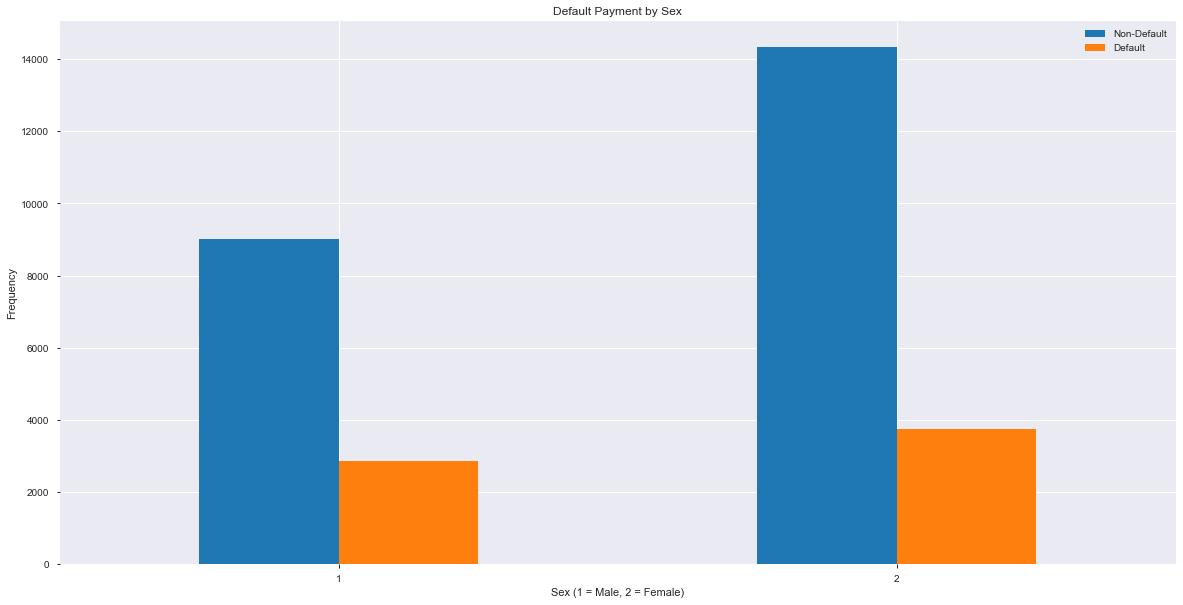

In [63]:
pd.crosstab(data.SEX_ID,data.def_pay,normalize=False).plot(kind="bar",rot=0,figsize=(20,10))
plt.title('Default Payment by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)' )
plt.legend(["Non-Default", "Default"])
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What does the relationship between marital status and default rate look like?

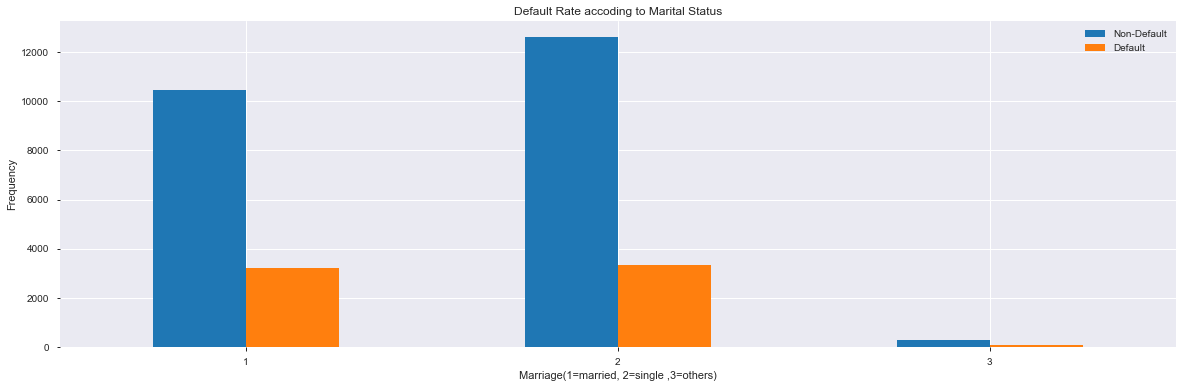

In [64]:
pd.crosstab(data.MARRIAGE,data.def_pay,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Rate accoding to Marital Status')
plt.xlabel('Marriage(1=married, 2=single ,3=others)' )
plt.legend(["Non-Default", "Default"])
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Can we predict default rates based on the level of Education a customer has obtained?

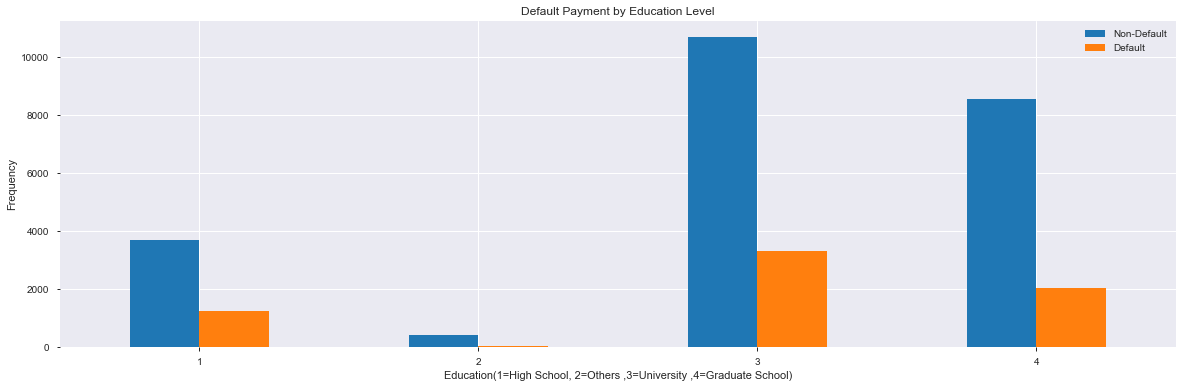

In [65]:
pd.crosstab(data.EDUCATION_ID,data.def_pay,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by Education Level')
plt.xlabel('Education(1=High School, 2=Others ,3=University ,4=Graduate School)' )
plt.legend(["Non-Default", "Default"])
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Is Age a predictor of Default?

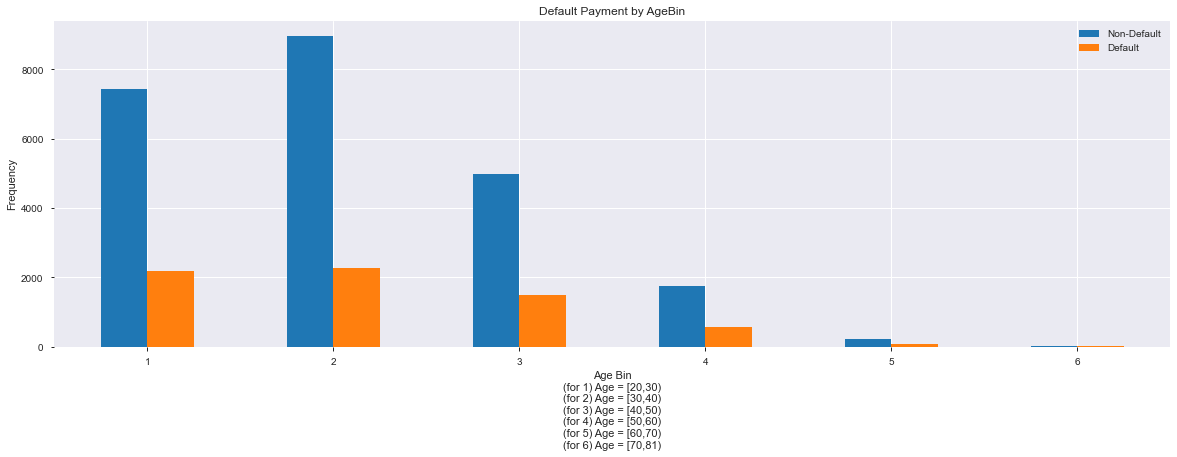

In [66]:
pd.crosstab(data.AgeBin,data.def_pay,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by AgeBin')
plt.xlabel('Age Bin\n (for 1) Age = [20,30) \n (for 2) Age = [30,40) \n' +
           ' (for 3) Age = [40,50) \n (for 4) Age = [50,60) \n (for 5) Age = [60,70) \n(for 6) Age = [70,81)')
plt.legend(["Non-Default", "Default"])
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Default Rates as a function of Gender/Marital Status

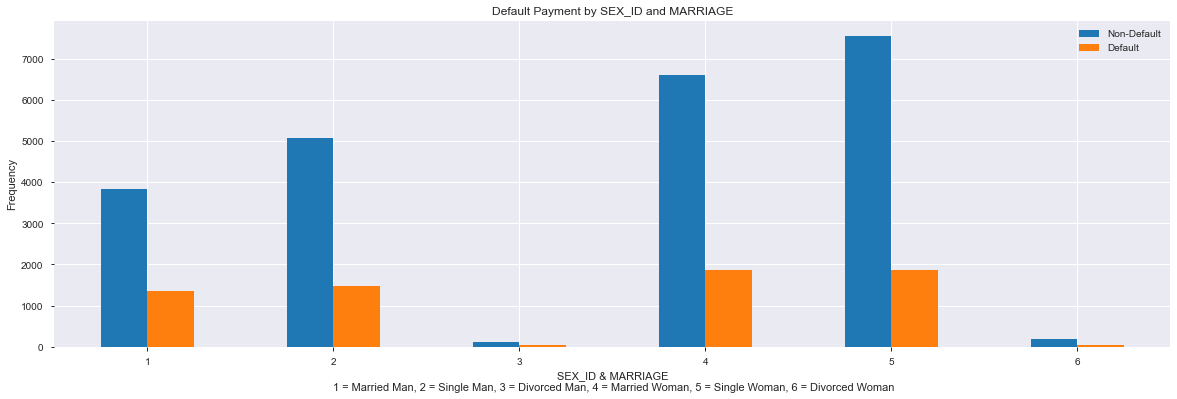

In [67]:
pd.crosstab(data.SEX_MAR,data.def_pay,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by SEX_ID and MARRIAGE')
plt.xlabel('SEX_ID & MARRIAGE\n 1 = Married Man, 2 = Single Man, 3 = Divorced Man, 4 = Married Woman, 5 = Single Woman, 6 = Divorced Woman')
plt.legend(["Non-Default", "Default"])
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Default Rates as a function of Gender/Age Status

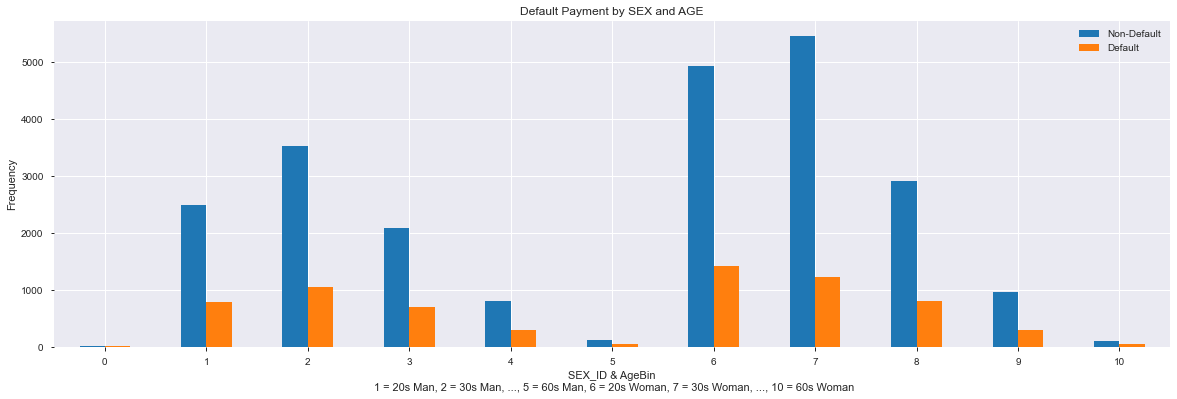

In [68]:
pd.crosstab(data.SEX_AGE,data.def_pay,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by SEX and AGE')
plt.xlabel('SEX_ID & AgeBin\n 1 = 20s Man, 2 = 30s Man, ..., 5 = 60s Man, 6 = 20s Woman, 7 = 30s Woman, ..., 10 = 60s Woman')
plt.legend(["Non-Default", "Default"])
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Predictive Modeling

Will train 80% of the data and test 20%. 

In [69]:
features = ['LIMIT_BAL', 'EDUCATION','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SEX_MAR', 'AgeBin', 'SEX_AGE', 'average_5', 'average_4',
            'average_3', 'average_2', 'average_1', 'InvoiceLimit_5', 'InvoiceLimit_6',
            'InvoiceLimit_4', 'InvoiceLimit_3', 'InvoiceLimit_2','InvoiceLimit_1',
            'active_6','active_5','active_4','active_3','active_2','active_1','PAY_1_-1',
            'PAY_1_-2', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 
            'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_-2', 
            'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 
            'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 
            'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 
            'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 
            'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 
            'PAY_4_8', 'PAY_5_-1', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 
            'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 
            'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 
            'PAY_6_6', 'PAY_6_7', 'PAY_6_8']
target = 'def_pay'
y = data['def_pay'].copy()
X = data[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
data_train = X_train.join(y_train)

In [70]:
# Selecting Optimal parameters
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import classification_report

In [71]:
print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

### Random Forest Classifier

In [72]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [73]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [89]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [90]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9655172413793104


Confusion matrix, without normalization
[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  86   0   0   0   1   1   0   2   0]
 [  0   1  91   0   0   0   0   0   0   0]
 [  0   0   1  92   0   0   0   0   0   0]
 [  0   0   0   0  76   0   0   0   0   0]
 [  0   0   0   1   0 104   1   0   0   2]
 [  0   1   0   0   0   0  88   0   0   0]
 [  0   0   0   0   0   0   0  77   1   0]
 [  0   2   1   1   1   3   0   1  81   2]
 [  0   0   0   2   0   3   0   0   1  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.96 0.   0.   0.   0.01 0.01 0.   0.02 0.  ]
 [0.   0.01 0.99 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.   0.96 0.01 0.   0.   0.02]
 [0.   0.01 0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.99 0.01 0.  ]
 [0.   0.02 0.01 0.01 0.01 0.03 0.   0.01 0.88 0.02]
 [0.   0.   0.   0.02 0.

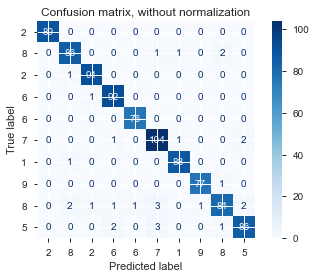

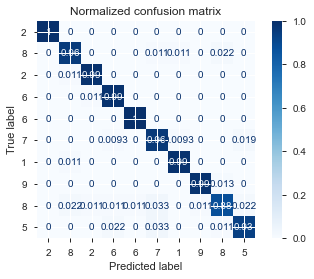

In [91]:
from sklearn.metrics import plot_confusion_matrix

classifier = svm.SVC(kernel='linear', C=2).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=y_pred,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Correlation Matrices

In [92]:
# listing different types of features for filtering
pay = ['PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paid = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
time_series = bill + paid + ['LIMIT_BAL']

cat_features = ['SEX','EDUCATION','MARRIAGE','AGE']  +pay #+ ['LIMIT_BAL']
num_features = sorted(list(set(data.columns)-set(cat_features)-set(['def_pay'])))

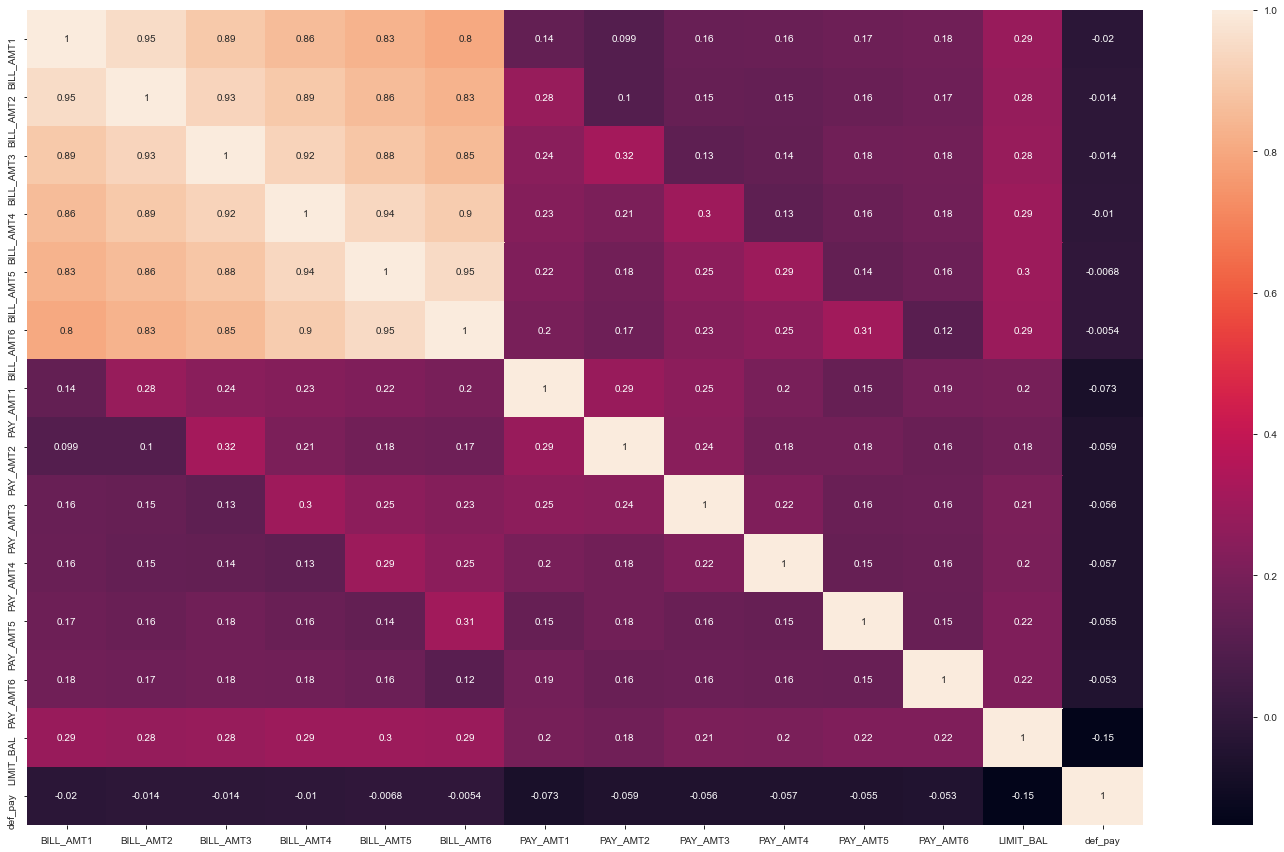

In [93]:
# correlation matrix for numerical features
num = bill+paid+['LIMIT_BAL']+['def_pay']
plt.figure(figsize=(25,15))
sns.heatmap(data[num].corr(method='pearson'),annot=True)

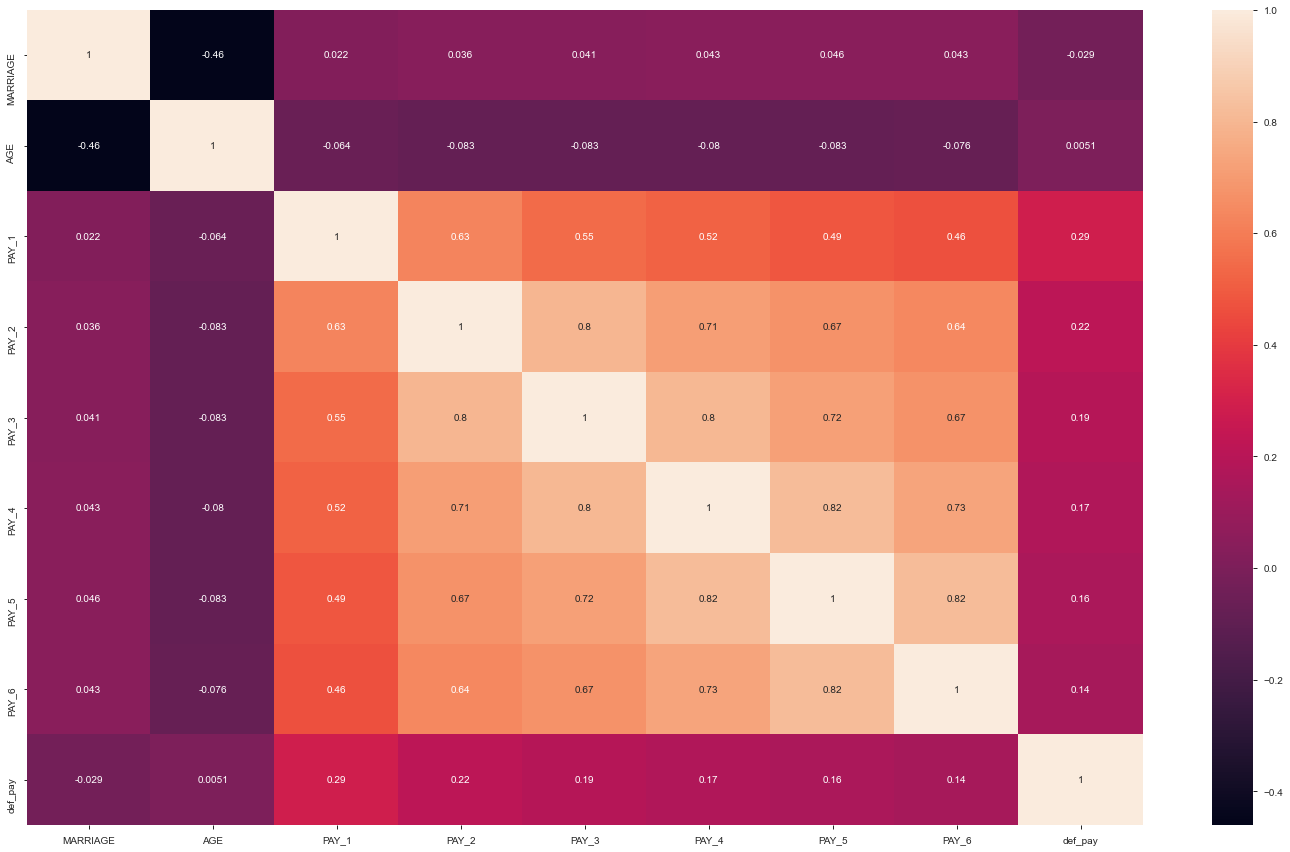

In [94]:
# correlation matrix for numerical features
cat = cat_features+['def_pay']
plt.figure(figsize=(25,15))
sns.heatmap(data[cat].corr(method='spearman'),annot=True)

#### Decision Tree Classifier

In [95]:
dtclassifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')
dtclassifier.fit(X_train, y_train)
dtprediction = dtclassifier.predict(X_test)
print('Accuracy of Decision Tree:', accuracy_score(dtprediction,y_test))

Accuracy of Decision Tree: 0.5116796440489433


In [107]:
y=data['def_pay']
X=data.drop(columns=['def_pay'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


In [109]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred(X_train)))
print('Precision:', precision_score(y_train, y_predt(X_train)))
print('Recall:', recall_score(y_train, y_pred(X_train)))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred(X_test)))
print('Precision:', precision_score(y_test, y_pred(X_test)))
print('Recall:', recall_score(y_test, y_pred(X_test)))

ValueError: could not convert string to float: 'female'

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model